In [105]:
# 相关性分析, 通过相关性分析可以得到两个变量之间的相关性系数，从而可以得到两个变量之间的相关性强弱


In [106]:
# 读取数据,最后三列数据不读取
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 设置支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}  # 用来正常显示中文标签
# 设置学术化的图片风格
sns.set_style("whitegrid", rc=rc)  #设置绘图风格
sns.set_palette("hls")  #设置颜色主题
sns.set_context("paper")  #设置绘图元素缩放比例
data_raw = pd.read_csv('data/原始数据.csv')
#不包括index和最后一列
data_raw.columns = ['index', 'totalseconds', 'totalvalue', 'Industry', 'Nature', 'Year', 'EmployeesNum', 'Income', 'Area', 'SL11', 'SL12', 'SL13', 'SL21', 'SL22', 'SL23', 'KMC11', 'KMC12', 'KMC13', 'KMC21', 'KMC22', 'KMC23', 'KMC31', 'KMC32', 'KMC33', 'OLC11', 'OLC12', 'OLC13', 'OLC21', 'OLC22', 'OLC23', 'OLC31', 'OLC32', 'OLC33','TIC11','TIC12','TIC13','TIC14','TIC21','TIC22','TIC23','Awards1','Awards2','Awards3','Awards4','Awards5','Awards6','Awards7','TIC31','TIC32','TIC33','MCI1','MCI2','MCI3','StrategicFocus1','StrategicFocus2','StrategicFocus3','StrategicFocus4','StrategicFocus5','sugestion']
#删除第一列
data_raw = data_raw.drop(columns=['index'])
#删除最后一列
data_raw = data_raw.drop(columns=['sugestion'])
#保存为csv文件
data_raw.to_csv('exports/原始数据.csv', index=False)
data_raw

,totalseconds,totalvalue,Industry,Nature,Year,EmployeesNum,Income,Area,SL11,SL12,...,TIC32,TIC33,MCI1,MCI2,MCI3,StrategicFocus1,StrategicFocus2,StrategicFocus3,StrategicFocus4,StrategicFocus5
0,161,108,5,1,2,1,2,2,4,4,...,3,2,3,4,4,0,1,0,0,0
1,177,79,1,1,5,3,3,2,3,4,...,3,2,4,2,2,1,1,0,1,0
2,173,135,2,3,5,3,3,3,5,5,...,4,2,5,4,5,0,1,0,0,0
3,185,80,2,1,3,2,2,3,4,4,...,4,3,5,4,4,0,1,1,0,0
4,165,126,3,1,4,4,3,2,5,5,...,4,5,5,3,4,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,156,93,3,1,3,3,2,6,3,3,...,2,2,2,4,3,0,0,1,0,0
298,171,93,6,1,3,4,3,2,3,4,...,4,2,2,2,3,0,0,0,1,0
299,190,77,5,2,4,2,4,1,4,2,...,4,4,2,1,1,1,0,0,0,0
300,193,83,6,2,2,2,2,2,2,4,...,3,2,2,4,2,0,1,0,1,0


In [107]:
#量表数据
data = pd.read_csv('data/量表数据.csv')

In [108]:
#设置变量名,将x...y...z...分别设置为SL,KMC,OLC,TIC
data.columns = ['SL11', 'SL12', 'SL13', 'SL21', 'SL22', 'SL23', 'KMC11', 'KMC12', 'KMC13', 'KMC21', 'KMC22', 'KMC23', 'KMC31', 'KMC32', 'KMC33', 'OLC11', 'OLC12', 'OLC13', 'OLC21', 'OLC22', 'OLC23', 'OLC31', 'OLC32', 'OLC33', 'TIC11', 'TIC12', 'TIC13', 'TIC14','TIC21', 'TIC22', 'TIC23','TIC31', 'TIC32','TIC33', 'MCI1','MCI2','MCI3']
#保存为csv文件
data.to_csv('exports/量表数据.csv', index=False)

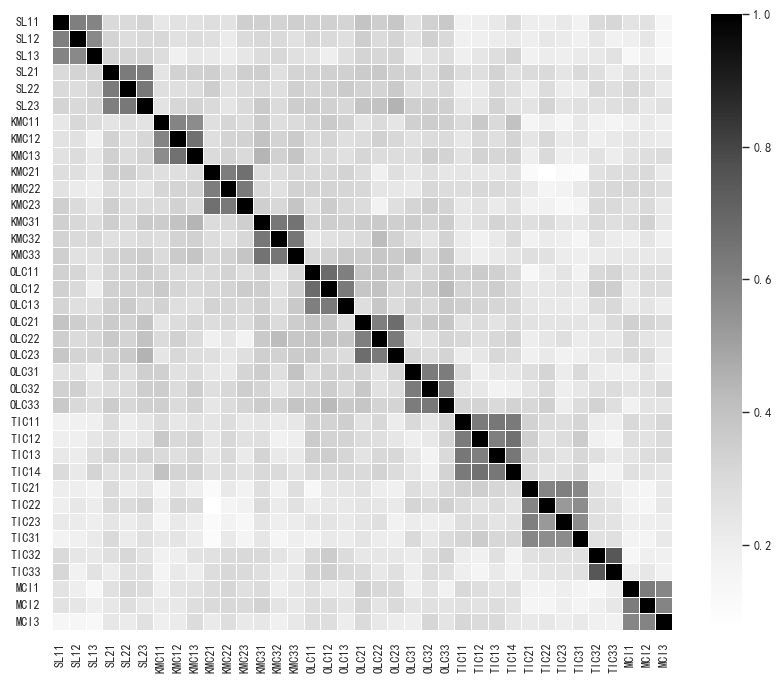

In [109]:
# 相关性分析
#热力图,黑白论文图
#颜色映射（Colormap）：使用灰度色系（如 gray、Greys）。
# 网格线：添加网格线以区分单元格。
# 数值标注：在单元格中显示相关系数值，便于精确阅读。
# 字体和样式：使用清晰的无衬线字体（如 Arial 或 Helvetica），并调整字体大小。
# 代码如下：
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='Greys', linewidths=0.5)
plt.show()




In [110]:
#分组再热力图
# 1.分组,SL,KMC,OLC,TIC,MCI
#计算列的之间的和再除以6
data_total = pd.DataFrame()
data_total['SL'] = (data['SL11'] + data['SL12'] + data['SL13'] + data['SL21'] + data['SL22'] + data['SL23'])/6
data_total['KMC'] = (data['KMC11'] + data['KMC12'] + data['KMC13'] + data['KMC21'] + data['KMC22'] + data['KMC23'] + data['KMC31'] + data['KMC32'] + data['KMC33'])/9
data_total['OLC'] = (data['OLC11'] + data['OLC12'] + data['OLC13'] + data['OLC21'] + data['OLC22'] + data['OLC23'] + data['OLC31'] + data['OLC32'] + data['OLC33'])/9
data_total['TIC'] = (data['TIC11'] + data['TIC12'] + data['TIC13'] + data['TIC14'] + data['TIC21'] + data['TIC22'] + data['TIC23'] + data['TIC31'] + data['TIC32'] + data['TIC33'])/10
data_total['MCI'] = (data['MCI1'] + data['MCI2'] + data['MCI3'])/3
data_total['Scale']= data_raw['EmployeesNum']
data_total['Year']= data_raw['Year']
#数据四舍五入
data_total = data_total.round(0)
data_total.to_csv('exports/量表数据总分.csv', index=False)
data_total.isnull().sum()


SL       0
KMC      0
OLC      0
TIC      0
MCI      0
Scale    0
Year     0
dtype: int64

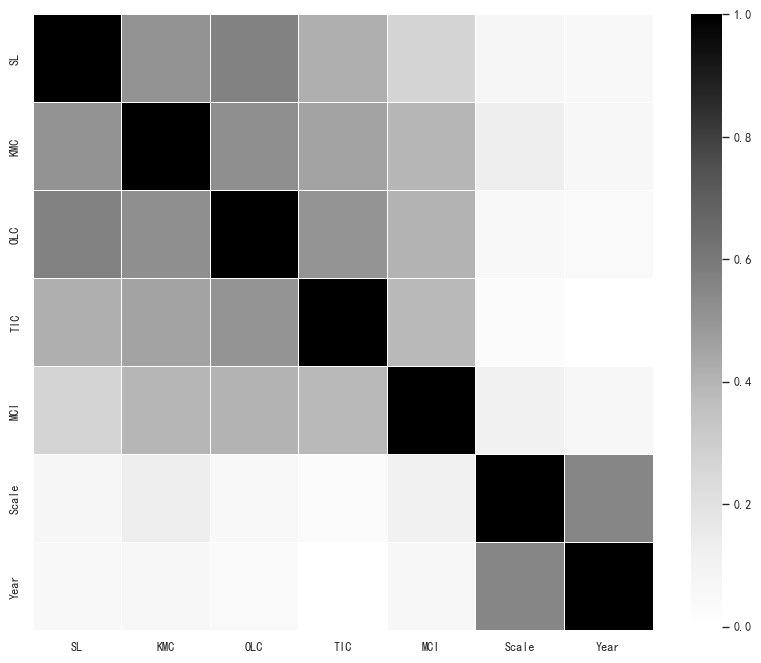

In [111]:
# 2.热力图
plt.figure(figsize=(10, 8))
sns.heatmap(data_total.corr(), cmap='Greys', linewidths=0.5)
plt.show()

In [112]:
data_total.corr()

,SL,KMC,OLC,TIC,MCI,Scale,Year
SL,1.000000,0.507578,0.569667,0.418114,0.271132,0.073890,0.049319
KMC,0.507578,1.000000,0.523254,0.456820,0.392441,0.130566,0.063711
OLC,0.569667,0.523254,1.000000,0.501026,0.403318,0.049856,0.043338
TIC,0.418114,0.456820,0.501026,1.000000,0.383337,0.031124,-0.006134
MCI,0.271132,0.392441,0.403318,0.383337,1.000000,0.107876,0.060607
Scale,0.073890,0.130566,0.049856,0.031124,0.107876,1.000000,0.555794
Year,0.049319,0.063711,0.043338,-0.006134,0.060607,0.555794,1.000000


In [113]:
data_level2 = pd.DataFrame()
data_level2['SL1'] = (data['SL11'] + data['SL12'] + data['SL13'])/3
data_level2['SL2'] = (data['SL21'] + data['SL22'] + data['SL23'])/3
data_level2['KMC1'] = (data['KMC11'] + data['KMC12'] + data['KMC13'])/3
data_level2['KMC2'] = (data['KMC21'] + data['KMC22'] + data['KMC23'])/3
data_level2['KMC3'] = (data['KMC31'] + data['KMC32'] + data['KMC33'])/3
data_level2['OLC1'] = (data['OLC11'] + data['OLC12'] + data['OLC13'])/3
data_level2['OLC2'] = (data['OLC21'] + data['OLC22'] + data['OLC23'])/3
data_level2['OLC3'] = (data['OLC31'] + data['OLC32'] + data['OLC33'])/3
data_level2['TIC1'] = (data['TIC11'] + data['TIC12'] + data['TIC13'] + data['TIC14'])/4
data_level2['TIC2'] = (data['TIC21'] + data['TIC22'] + data['TIC23'])/3
data_level2['TIC3'] = (data['TIC31'] + data['TIC32'] +data['TIC33'])/3
data_level2['MCI'] = (data['MCI1'] + data['MCI2'] + data['MCI3'])/3
data_level2 = data_level2.round(0)
data_level2.to_csv('exports/量表数据二级总分.csv', index=False)

In [114]:
#读取数据,修改变量名,index,totalseconds,totalvalue,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Row1,Q7_Row2,Q7_Row3,Q8_Row1,Q8_Row2,Q8_Row3,Q9_Row1,Q9_Row2,Q10_Row1,Q10_Row2,Q11_Row1,Q11_Row2,Q12_Row1,Q12_Row2,Q13_Row1,Q13_Row2,Q14_Row1,Q14_Row2,Q15,Q16,Q17,Q18,Q19_Row1,Q19_Row2,Q19_Row3,Q20_Choice1,Q20_Choice2,Q20_Choice3,Q20_Choice4,Q20_Choice5,Q20_Choice6,Q20_Choice7,Q21,Q22,Q23,Q24,Q25,Q26,Q27_Choice1,Q27_Choice2,Q27_Choice3,Q27_Choice4,Q27_Choice5,Q28改为index,totalseconds,totalvalue,Industry,Nature,Year,EmployeesNum,Income,area,SL11,SL12,SL13,SL21,SL22,SL23,KMC11,KMC12,KMC13,KMC21,KMC22,KMC23,KMC31,KMC32,KMC33,OLC11,OLC12,OLC13,OLC21,OLC22,OLC23,OLC31,OLC32,OLC33,TIC11,TIC12,TIC13,TIC14,TIC21,TIC22,TIC23,Awards,NewNum,TIC31,TIC32,TIC33,MCI1,MCI2,MCI3,Strategic Focus
#查看null
data_raw.isnull().sum()

totalseconds       0
totalvalue         0
Industry           0
Nature             0
Year               0
EmployeesNum       0
Income             0
Area               0
SL11               0
SL12               0
SL13               0
SL21               0
SL22               0
SL23               0
KMC11              0
KMC12              0
KMC13              0
KMC21              0
KMC22              0
KMC23              0
KMC31              0
KMC32              0
KMC33              0
OLC11              0
OLC12              0
OLC13              0
OLC21              0
OLC22              0
OLC23              0
OLC31              0
OLC32              0
OLC33              0
TIC11              0
TIC12              0
TIC13              0
TIC14              0
TIC21              0
TIC22              0
TIC23              0
Awards1            0
Awards2            0
Awards3            0
Awards4            0
Awards5            0
Awards6            0
Awards7            0
TIC31              0
TIC32        

In [115]:
#多元回归模型,\mathrm{TIC}=\beta_0+\beta_1\mathrm{SL}+\beta_2\text{企业规模}+\beta_3\text{成立年限}+\epsilon
data_linear=pd.DataFrame()
data_linear['TIC'] = data_total['TIC']
data_linear['SL'] = data_total['SL']
data_linear['SL1'] = data_level2['SL1']
data_linear['SL2'] = data_level2['SL2']
data_linear['Year'] = data_raw['Year']
data_linear['Scale'] = data_raw['EmployeesNum']
data_linear['TIC2']=data_level2['TIC2']
data_linear['Industry'] = data_raw['Industry']
#年份,新企业为1,老企业为0
data_linear['New enterprise'] = np.where(data_linear['Year'] == 1|2, 1, 0)
data_linear['Old enterprise'] = np.where(data_linear['Year'] == 3|4|5, 1, 0)
#小规模和微型企业
data_linear['Small and micro enterprises'] = np.where(data_linear['Scale'] == 1|2, 1, 0)
data_linear['Medium and large enterprises'] = np.where(data_linear['Scale'] == 3|4|5, 1, 0)
data_linear


,TIC,SL,SL1,SL2,Year,Scale,TIC2,Industry,New enterprise,Old enterprise,Small and micro enterprises,Medium and large enterprises
0,3.0,4.0,4.0,4.0,2,1,4.0,5,0,0,0,0
1,3.0,4.0,4.0,5.0,5,3,2.0,1,0,0,1,0
2,4.0,5.0,5.0,5.0,5,3,3.0,2,0,0,1,0
3,2.0,3.0,4.0,2.0,3,2,2.0,2,1,0,0,0
4,4.0,4.0,5.0,4.0,4,4,5.0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
297,3.0,2.0,3.0,2.0,3,3,2.0,3,1,0,1,0
298,3.0,3.0,4.0,2.0,3,4,4.0,6,1,0,0,0
299,3.0,3.0,3.0,3.0,4,2,3.0,5,0,0,0,0
300,2.0,3.0,3.0,3.0,2,2,2.0,6,0,0,0,0


In [116]:
data_linear.to_csv('exports/多元线性回归数据.csv', index=False)

In [117]:
#中介效应
data_med=pd.DataFrame()
data_med['TIC'] = data_total['TIC']
data_med['SL'] = data_total['SL']
data_med['SL1'] = data_level2['SL1']
data_med['SL2'] = data_level2['SL2']
data_med['KMC'] = data_total['KMC']
data_med['KMC1'] = data_level2['KMC1']
data_med['KMC2'] = data_level2['KMC2']
data_med['KMC3'] = data_level2['KMC3']
data_med['OLC'] = data_total['OLC']
data_med['OLC1'] = data_level2['OLC1']
data_med['OLC2'] = data_level2['OLC2']
data_med['OLC3'] = data_level2['OLC3']
data_med

,TIC,SL,SL1,SL2,KMC,KMC1,KMC2,KMC3,OLC,OLC1,OLC2,OLC3
0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0
1,3.0,4.0,4.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
2,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0
3,2.0,3.0,4.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0
4,4.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
297,3.0,2.0,3.0,2.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,3.0
298,3.0,3.0,4.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0,3.0
299,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0
300,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,1.0


In [118]:
data_med.to_csv('exports/中介效应数据.csv', index=False)

In [119]:
#调节效应
data_mod=pd.DataFrame()
data_mod['TIC'] = data_total['TIC']
data_mod['SL'] = data_total['SL']
data_mod['SL1'] = data_level2['SL1']
data_mod['SL2'] = data_level2['SL2']
data_mod['KMC'] = data_total['KMC']
data_mod['KMC1'] = data_level2['KMC1']
data_mod['KMC2'] = data_level2['KMC2']
data_mod['KMC3'] = data_level2['KMC3']
data_mod['OLC'] = data_total['OLC']
data_mod['OLC1'] = data_level2['OLC1']
data_mod['OLC2'] = data_level2['OLC2']
data_mod['OLC3'] = data_level2['OLC3']
data_mod['Year'] = data_raw['Year']
data_mod['Scale'] = data_raw['EmployeesNum']
data_mod['MCI'] = data_total['MCI']
data_mod['low_MCI'] = np.where(data_mod['MCI'] <= 3, 1, 0)
data_mod['high_MCI'] = np.where(data_mod['MCI'] > 3, 1, 0)
data_mod

,TIC,SL,SL1,SL2,KMC,KMC1,KMC2,KMC3,OLC,OLC1,OLC2,OLC3,Year,Scale,MCI,low_MCI,high_MCI
0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,2,1,4.0,0,1
1,3.0,4.0,4.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,5,3,3.0,1,0
2,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5,3,5.0,0,1
3,2.0,3.0,4.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,3,2,4.0,0,1
4,4.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4,4,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,3.0,2.0,3.0,2.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,3.0,3,3,3.0,1,0
298,3.0,3.0,4.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0,3.0,3,4,2.0,1,0
299,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,4,2,1.0,1,0
300,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,1.0,2,2,3.0,1,0


In [120]:
data_mod.to_csv('exports/调节效应数据.csv', index=False)

In [121]:
#绘制调节效应斜率图
data_k=pd.read_csv('data/spssau_graph_rawdata.csv')
data_k

,SL,平均值,高水平(+1SD),低水平(-1SD)
0,0,3.333612,3.570980,3.096244
1,1,3.650091,4.006449,3.293734


['SimHei']


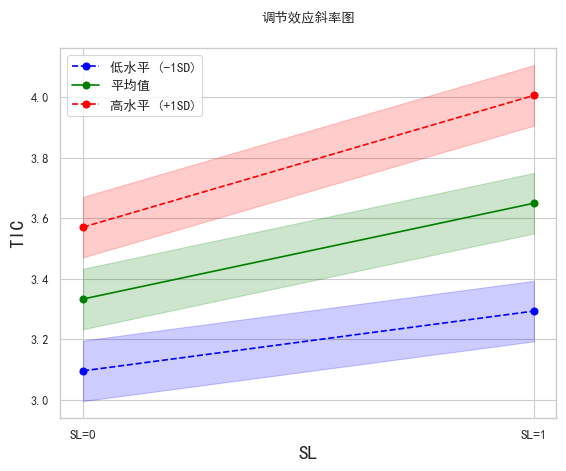

<Figure size 640x480 with 0 Axes>

In [122]:
from matplotlib.font_manager import FontProperties

#调节效应斜率图
# SL,"平均值","高水平(+1SD)","低水平(-1SD)"
# 0,3.3336120835139686,3.5709802268085222,3.096243940219415
# 1,3.6500914037958476,4.0064486972238065,3.2937341103678888

import matplotlib.font_manager as fm

# Specify the path to the SimHei font
font_path = "./Fonts/simhei.ttf"

# Load the font properties and set them globally
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Confirming the font is correctly set
print(plt.rcParams['font.sans-serif'])

# 示例数据
data_k = {
    "SL": [0, 1],
    "平均值": [3.3336, 3.6501],
    "高水平 (+1SD)": [3.5710, 4.0064],
    "低水平 (-1SD)": [3.0962, 3.2937],
    "平均值_上限": [3.4336, 3.7501],
    "平均值_下限": [3.2336, 3.5501],
    "高水平 (+1SD)_上限": [3.6710, 4.1064],
    "高水平 (+1SD)_下限": [3.4710, 3.9064],
    "低水平 (-1SD)_上限": [3.1962, 3.3937],
    "低水平 (-1SD)_下限": [2.9962, 3.1937]
}
df = pd.DataFrame(data_k)


# 绘制斜率图
plt.plot(df["SL"], df["低水平 (-1SD)"], marker='o', label="低水平 (-1SD)", color='blue', linestyle='--')
plt.plot(df["SL"], df["平均值"], marker='o', label="平均值", color='green', linestyle='-')
plt.plot(df["SL"], df["高水平 (+1SD)"], marker='o', label="高水平 (+1SD)", color='red', linestyle='--')

# 添加置信区间
plt.fill_between(df["SL"], df["低水平 (-1SD)_下限"], df["低水平 (-1SD)_上限"], color='blue', alpha=0.2)
plt.fill_between(df["SL"], df["平均值_下限"], df["平均值_上限"], color='green', alpha=0.2)
plt.fill_between(df["SL"], df["高水平 (+1SD)_下限"], df["高水平 (+1SD)_上限"], color='red', alpha=0.2)

# 添加标题和标签
plt.title("调节效应斜率图", fontsize=16, pad=20, fontproperties=font_prop)
plt.xlabel("SL", fontsize=14, fontproperties=font_prop)
plt.ylabel("TIC", fontsize=14, fontproperties=font_prop)
plt.xticks([0, 1], ["SL=0", "SL=1"], fontproperties=font_prop)  # 设置 X 轴刻度标签

# 添加图例,显示中文
plt.legend(loc='upper left', prop=font_prop)

# 显示图形

plt.show()
plt.savefig("./exports/k.png", dpi=300)



In [123]:
#调节效应斜率图export